In [138]:
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')  # 'default'

df = pd.DataFrame({'c1': list('abcdefg')})
df.loc[5, 'c1'] = 'Value'
df

,c1
0,a
1,b
2,c
3,d
4,e
5,Value
6,g


In [2]:
df = df.assign(c2 = df.c1)
df

,c1,c2
0,a,a
1,b,b
2,c,c
3,d,d
4,e,e
5,Value,Value
6,g,g


In [21]:
df.loc[df['c1'] == 'Value', 'c2'] = 10
df

,c1,c2
0,a,a
1,b,b
2,c,c
3,d,d
4,e,e
5,Value,10
6,g,g


In [22]:
df[5:6].values

array([['Value', 10]], dtype=object)

In [29]:
df5 = df[['c1','c2']][5:6]
df5

,c1,c2
5,Value,10


In [36]:
df.iloc[0] = df5
df

,c1,c2
0,Value,10
1,b,b
2,c,c
3,d,d
4,e,e
5,Value,10
6,g,g


In [38]:
list1  = [0,3,6]
df.iloc[list1] =df5
df

,c1,c2
0,Value,10
1,b,b
2,c,c
3,Value,10
4,e,e
5,Value,10
6,Value,10


In [139]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [49]:
#df[:1] = df[1:2]
#df.head()

In [50]:
# Yeni Kutuphane import ettik

from sklearn.neighbors import LocalOutlierFactor

In [51]:
# n_neighbors = komsu sayisi
# contamination = yogunluk ifade 
# 20 ve 0.1 degeri Veri sayisi ve is bilgisine dayali olarak belirlendi varsadik

clf = LocalOutlierFactor(n_neighbors= 20, contamination= 0.1)

In [52]:
# clf nesnesi LocalOutlierFactorun bicimsel ozelliklerini kullaniyor

clf

LocalOutlierFactor(contamination=0.1)

In [53]:
# Algoritmayi calistirma islemi 

clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [54]:
# Her bir gozlem birimi icin olusturulmus scorelar var

df_score = clf.negative_outlier_factor_

In [55]:
df_score[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [56]:
# Degerler arasindaki farklari inceliyoruz

np.sort(df_score)[0:10]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387])

In [57]:
# 13. Degeri esik degeri olsun dedik

esik_deger = np.sort(df_score)[13]
esik_deger

-3.823787967755565

In [58]:
aykiri_olmayan_tf = df_score > esik_deger
aykiri_olmayan_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [59]:
# Aykiri Olmayan degerler ulasmak

df[aykiri_olmayan_tf]

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [60]:
df[~aykiri_olmayan_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [63]:
baski_degeri = df[df_score == esik_deger]
baski_degeri

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [68]:
df[~aykiri_olmayan_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [91]:
df_outlier = df[~aykiri_olmayan_tf]
df_outlier

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [99]:
df_outlier[0:] = baski_degeri
df_outlier

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756.0,4.73,4.5,3.19
10377,0.45,68.6,57.0,756.0,4.73,4.5,3.19
24067,0.45,68.6,57.0,756.0,4.73,4.5,3.19
31230,0.45,68.6,57.0,756.0,4.73,4.5,3.19
35633,0.45,68.6,57.0,756.0,4.73,4.5,3.19
36503,0.45,68.6,57.0,756.0,4.73,4.5,3.19
38840,0.45,68.6,57.0,756.0,4.73,4.5,3.19
41918,0.45,68.6,57.0,756.0,4.73,4.5,3.19
45688,0.45,68.6,57.0,756.0,4.73,4.5,3.19
48410,0.45,68.6,57.0,756.0,4.73,4.5,3.19


In [94]:
df[~aykiri_olmayan_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [106]:
df[~aykiri_olmayan_tf] = df_outlier
df[~aykiri_olmayan_tf]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756.0,4.73,4.5,3.19
10377,0.45,68.6,57.0,756.0,4.73,4.5,3.19
24067,0.45,68.6,57.0,756.0,4.73,4.5,3.19
31230,0.45,68.6,57.0,756.0,4.73,4.5,3.19
35633,0.45,68.6,57.0,756.0,4.73,4.5,3.19
36503,0.45,68.6,57.0,756.0,4.73,4.5,3.19
38840,0.45,68.6,57.0,756.0,4.73,4.5,3.19
41918,0.45,68.6,57.0,756.0,4.73,4.5,3.19
45688,0.45,68.6,57.0,756.0,4.73,4.5,3.19
48410,0.45,68.6,57.0,756.0,4.73,4.5,3.19


In [107]:
df[aykiri_olmayan_tf]

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757.0,6.15,6.12,3.74


In [123]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [124]:
print(df.price.skew())
df.price.describe()

1.618395283383529


count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [125]:
print(df.table.skew())
df.table.describe()

0.7968958486695427


count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

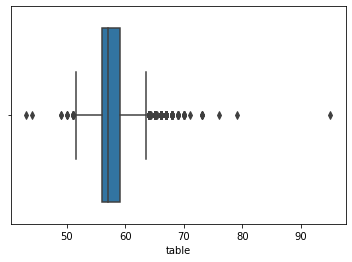

In [130]:
sns.boxplot(x='table', data =df);

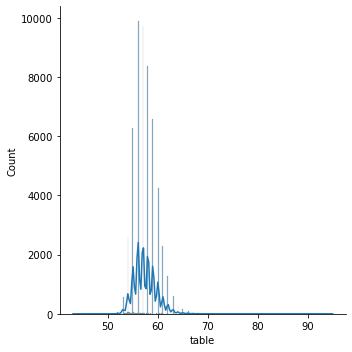

In [132]:
sns.displot(df.table, kde = True);

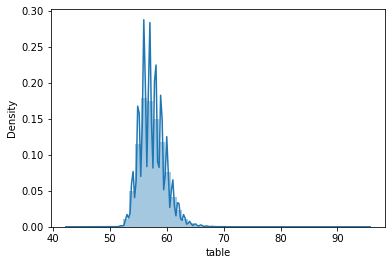

In [135]:
sns.distplot(df.table, kde = True);

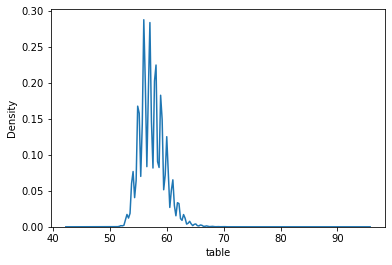

In [140]:
sns.distplot(df.table, hist = False);

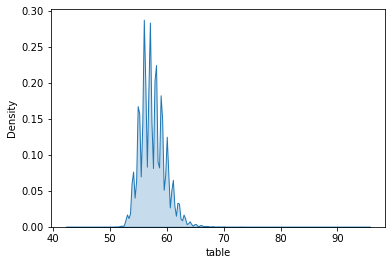

In [147]:
sns.kdeplot(df.table, shade = True);

In [197]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='table'>

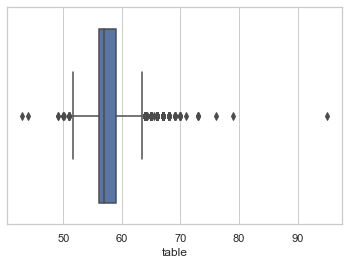

In [198]:
# Grafik Ayarlari
# Arka tarf cizgili olur
sns.set_theme(style="whitegrid")
sns.boxplot(df.table)

<AxesSubplot:xlabel='table'>

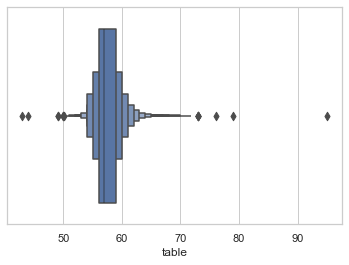

In [199]:
sns.boxenplot(df.table)

In [164]:
IQR = df.table.describe()[6] - df.table.describe()[4]
IQR

3.0

In [167]:
alt_s = df.table.describe()[4] - 1.5*IQR
ust_s = df.table.describe()[6] + 1.5*IQR
print (alt_s, ust_s)

51.5 63.5


In [209]:
aykiri_tf = (df.table < alt_s) | (df.table > ust_s)
aykiri_tf

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [266]:
aykirilar = df['table'][(df.table < alt_s) | (df.table > ust_s)]
aykirilar

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [202]:
df_table = df.table
df_table

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [203]:
df_table[(aykirilar.index)]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [204]:
aykirilar.index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

In [210]:
df_table[~(aykiri_tf)]

0        55.0
1        61.0
3        58.0
4        58.0
5        57.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53335, dtype: float64

In [225]:
aykirilar

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [238]:
aykirilar.transform(lambda x :  df_table.mean())

2        57.457184
91       57.457184
145      57.457184
219      57.457184
227      57.457184
           ...    
53695    57.457184
53697    57.457184
53756    57.457184
53757    57.457184
53785    57.457184
Name: table, Length: 605, dtype: float64

In [257]:
aykirilar.transform(lambda x : (51.5) if (x< 51.5) else 63.5)

2        63.5
91       63.5
145      63.5
219      63.5
227      63.5
         ... 
53695    63.5
53697    63.5
53756    63.5
53757    63.5
53785    63.5
Name: table, Length: 605, dtype: float64

In [267]:
aykirilar.transform(lambda x : (alt_s) if (x< alt_s) else ust_s).value_counts()

63.5    589
51.5     16
Name: table, dtype: int64

In [269]:
aykirilar

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [353]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [285]:
from sklearn.neighbors import LocalOutlierFactor

In [286]:
clf = LocalOutlierFactor(n_neighbors= 20, contamination= 0.1)
clf

LocalOutlierFactor(contamination=0.1)

In [287]:
clf.fit_predict(df.select_dtypes(['float64', 'int64']))

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,
        1, -1,  1,  1,  1

In [288]:
df_scores = clf.negative_outlier_factor_

In [295]:
np.sort(df_scores)[:20]

array([-3.30666549, -2.33154258, -2.18736263, -1.98330455, -1.81981065,
       -1.79815601, -1.73853455, -1.67893803, -1.67288622, -1.64176048,
       -1.62372071, -1.56936213, -1.49508486, -1.48216547, -1.47085665,
       -1.41998804, -1.4016868 , -1.368511  , -1.35970075, -1.35623266])

In [298]:
esik = np.sort(df_scores)[16]
esik

-1.401686796839965

In [300]:
df_scores > esik

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [299]:
df[df_scores > esik]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [302]:
# aykirilar
df[df_scores < esik]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
102,44.30,2.50,Female,Yes,Sat,Dinner,3
111,7.25,1.00,Female,No,Sat,Dinner,1
149,7.51,2.00,Male,No,Thur,Lunch,2
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
172,7.25,5.15,Male,Yes,Sun,Dinner,2
178,9.60,4.00,Female,Yes,Sun,Dinner,2


<AxesSubplot:xlabel='total_bill'>

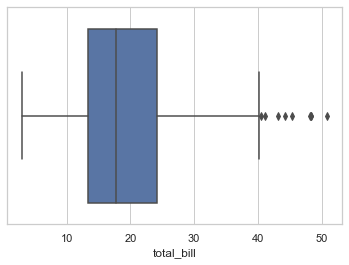

In [303]:
sns.boxplot(df.total_bill)

In [313]:
df.total_bill.describe()[[4,6]]

25%    13.3475
75%    24.1275
Name: total_bill, dtype: float64

In [358]:
IQR = df.total_bill.describe()[6] - df.total_bill.describe()[4]
alt_s = df.total_bill.describe()[4] - 1.5*IQR
ust_s = df.total_bill.describe()[6] + 1.5*IQR
print (f'{alt_s:.2f}', f'{ust_s:.2f}', f'{IQR:.2f}')

-2.82 40.30 10.78


In [319]:
IQR = df.tip.describe()[6] - df.tip.describe()[4]
alt_s = df.tip.describe()[4] - 1.5*IQR
ust_s = df.tip.describe()[6] + 1.5*IQR
print (alt_s, ust_s, IQR)

-0.34375 5.90625 1.5625


In [320]:
df.tip.describe()[[4,6]]

25%    2.0000
75%    3.5625
Name: tip, dtype: float64

In [321]:
alt_s = df.tip.describe()[4] - 1.5*IQR
alt_s

-0.34375

In [356]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


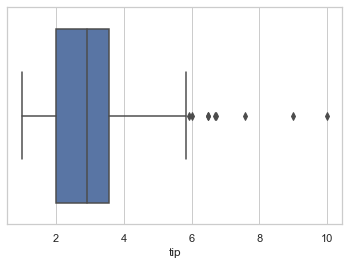

In [315]:
sns.boxplot(df.tip);

In [362]:
IQR = df['size'].describe()[6] - df['size'].describe()[4]
alt_s = df['size'].describe()[4] - 1.5*IQR
ust_s = df['size'].describe()[6] + 1.5*IQR
print (f'{alt_s:.2f}', f'{ust_s:.2f}', f'{IQR:.2f}')

0.50 4.50 1.00


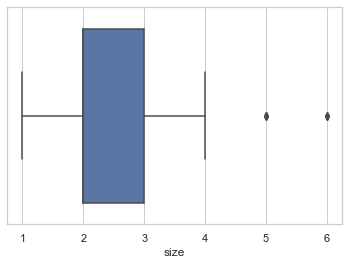

In [366]:
sns.boxplot(df['size']);

In [84]:
L1 = [0, 1, 10, 3, 4]

In [87]:
L1.sort(reverse= True)
L1

[10, 4, 3, 1, 0]

In [90]:
L1 = [0, 1, 10, 3, 4]
L1.sort(reverse= True)
print(L1[0])

10


In [1]:
L1 = [0, 1, 10, 3, 4]
L1.sort(reverse= True)
print(L1[0])

10


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [3]:
var_names = list(df)

In [6]:
n_df = np.array(df)

In [7]:
from ycimpute.imputer import iterforest

In [11]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [13]:
df_table = df['table']
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [14]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)

# inter quartile range (IQR)
IQR = Q3 - Q1

In [15]:
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR
print('Alt sinir=', alt_sinir,'\nUst sinir=', ust_sinir)

Alt sinir= 51.5 
Ust sinir= 63.5


In [16]:
# Aykiri True - False vektoru (alt sinir icin sadece)

aykiri_tf = (df_table < alt_sinir)

In [17]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [18]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [19]:
aykiri_ust_tf = (df_table > ust_sinir)
aykiri_ust_tf.head()

0    False
1    False
2     True
3    False
4    False
Name: table, dtype: bool

In [20]:
df_table[aykiri_ust_tf]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 589, dtype: float64